<a href="https://colab.research.google.com/github/maglkp/kaggle/blob/master/catsanddogsdw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#https://www.youtube.com/watch?v=iMabkF2XtBY

# if keras errors prepend tensorflow.python to below imports
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt

import os
import zipfile

import matplotlib.pyplot as plt
import matplotlib.image as mpimage

%matplotlib inline

In [23]:
!wget --no-check-certificate \
https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
  -O /tmp/cats_and_dogs_filtered.zip

--2019-04-12 13:19:01--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.141.128, 2607:f8b0:400c:c06::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.141.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   118MB/s    in 0.6s    

2019-04-12 13:19:01 (118 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [0]:
local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ = zipfile.ZipFile(local_zip)
zip_.extractall(path='/tmp')
zip_.close()

In [0]:
base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

validation_dir = os.path.join(base_dir, 'validation')
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')



In [26]:
!ls -l /tmp/

total 67012
drwxr-xr-x 4 root root     4096 Apr 12 13:08 cats_and_dogs_filtered
-rw-r--r-- 1 root root 68606236 Mar 28  2018 cats_and_dogs_filtered.zip
drwx------ 2 root root     4096 Apr 12 13:08 pymp-7bei5zd1


In [0]:
def plot_images(item_dir, top=25):
  
  all_items_dir = os.listdir(item_dir)
  item_files = [os.path.join(item_dir, file) for file in all_items_dir][:25]

  plt.figure(figsize=(10, 10))
  for idx, img_path in enumerate(item_files):
    plt.subplot(5, 5, idx + 1)

    img = mpimage.imread(img_path)
    plt.imshow(img)

  plt.tight_layout()  

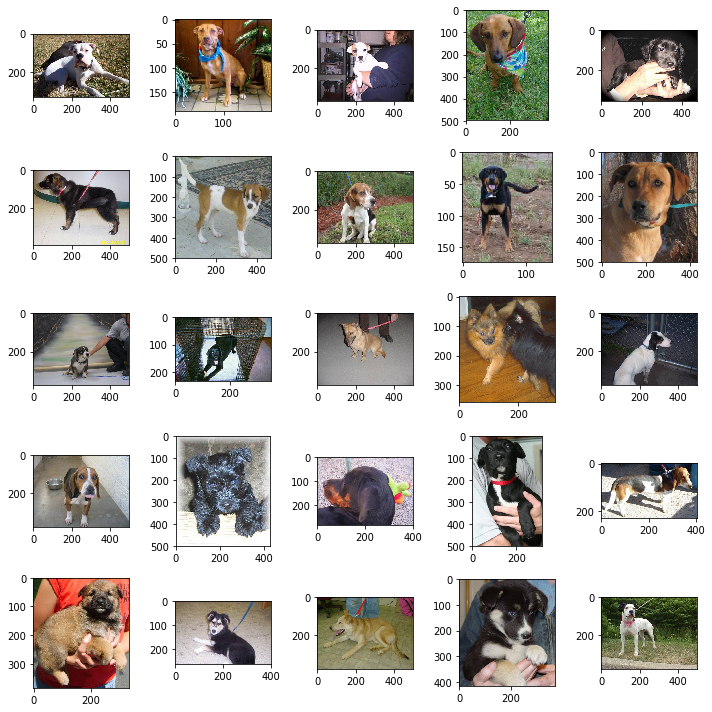

In [28]:
plot_images(train_dogs_dir)

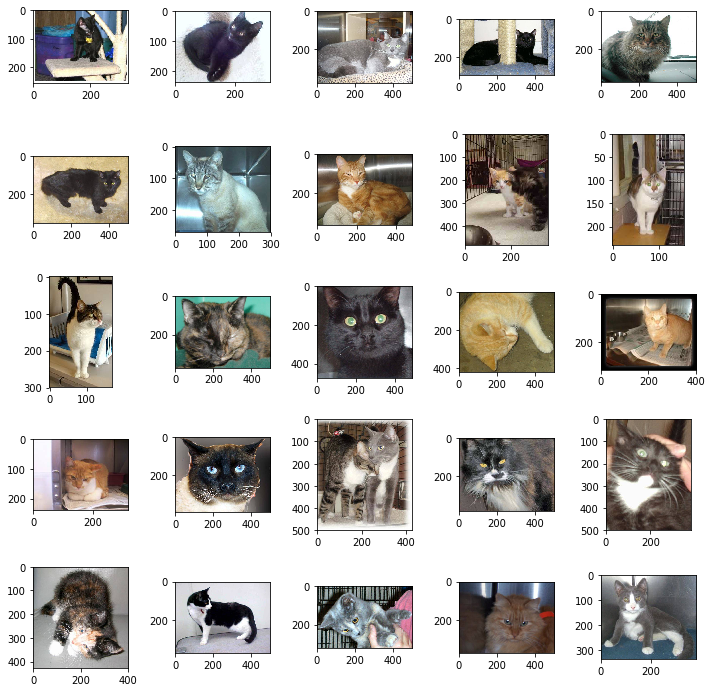

In [29]:
plot_images(train_cats_dir)

In [30]:
input_shape = (150, 150, 3)

model = Sequential([
    Conv2D(32, (3,3), input_shape=input_shape),
    MaxPool2D((2, 2)),
    
    Conv2D(64, (3,3)),
    MaxPool2D((2, 2)),
    
    Conv2D(256, (3,3)),
    MaxPool2D((2, 2)),
    
    Flatten(),
    
    Dense(64, activation='relu'),
    Dropout(.5),
    Dense(1, activation='sigmoid')
    
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 34, 34, 256)       147712    
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 17, 17, 256)       0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 73984)             0         
__________

In [0]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [32]:
train_generator = train_datagen.flow_from_directory(
  train_dir,
  target_size=(150, 150),
  batch_size=20,
  class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
  validation_dir,
  target_size=(150, 150),
  batch_size=20,
  class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [33]:
history = model.fit_generator(
  train_generator,
  steps_per_epoch=100,
  epochs=25,
  validation_data=validation_generator,
  validation_steps=50,
  verbose=2)

Epoch 1/25
 - 13s - loss: 0.8896 - acc: 0.5430 - val_loss: 0.6758 - val_acc: 0.5710
Epoch 2/25
 - 11s - loss: 0.6784 - acc: 0.5695 - val_loss: 0.6596 - val_acc: 0.6140
Epoch 3/25
 - 11s - loss: 0.7022 - acc: 0.5635 - val_loss: 0.6565 - val_acc: 0.6180
Epoch 4/25
 - 11s - loss: 0.6930 - acc: 0.5005 - val_loss: 0.6897 - val_acc: 0.5000
Epoch 5/25
 - 11s - loss: 0.6924 - acc: 0.5050 - val_loss: 0.6932 - val_acc: 0.5000
Epoch 6/25
 - 11s - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6932 - val_acc: 0.5000
Epoch 7/25
 - 11s - loss: 0.6928 - acc: 0.5000 - val_loss: 0.6912 - val_acc: 0.5000
Epoch 8/25
 - 11s - loss: 0.6907 - acc: 0.4990 - val_loss: 0.6923 - val_acc: 0.5020
Epoch 9/25
 - 11s - loss: 0.6913 - acc: 0.5100 - val_loss: 0.6914 - val_acc: 0.5240
Epoch 10/25
 - 11s - loss: 0.6914 - acc: 0.5095 - val_loss: 0.6931 - val_acc: 0.5010
Epoch 11/25
 - 11s - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5010
Epoch 12/25
 - 11s - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_a